## Making Voronoi Diagrams
Making Voronoi Diagrams with Statsbomb 360 data

In [1]:
from mplsoccer import Sbopen, VerticalPitch
import numpy as np
import matplotlib.pyplot as plt

# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.

### Opening data
For this task use Statsbomb 360 data form the Sweden against Switzerland game at the Women’s UEFA Euro 2022. First, make the plot for Bennison’s goal from that game. Identify the id of this event. As the next step open the 360 data. Within the 360 data, the df_frame stores player location data, and df_visible stores areas tracked by Statsbomb during the match. From the latter take the visible area only for this specific event, and store it as a numpy array with apeces coordinates stored in separate rows.

In [7]:
# Instantiate mplsoccer parser
parser = Sbopen()

# open the event dataset for the game (i.e. 3835331)
df_event = parser.event(3835331)[0]
df_event.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_offensive,foul_won_defensive,block_offensive,foul_committed_advantage,foul_won_advantage,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,block_save_block,dribble_nutmeg
2697,47bd003c-0f9f-4c34-88f2-669bb5c391bb,2698,2,00:26:35,71,35,170,1.778986,3835331,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3122,5289fa36-8e1a-4d2c-b1f2-798e54f68eb7,3123,2,00:39:41,84,41,197,NaN,3835331,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2411,73826d6b-87c2-4572-b9be-eba6bbeb8aa4,2412,2,00:18:01,63,1,156,NaN,3835331,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# find Bennison goal
event = (df_event
         .query("outcome_name == 'Goal' and player_name == 'Hanna Ulrika Bennison'")
        #  .loc[df_event["outcome_name"] == 'Goal']
        #  .loc[df_event["player_name"] == 'Hanna Ulrika Bennison']
         )
# save it's id
event_id = event["id"].iloc[0]
event_id

'add42adc-73cf-4e98-b712-6f5020ce74ce'

In [15]:
# open 360
df_frame, df_visible = parser.frame(3835331)
# get visible area
visible_area = (np.array(df_visible
                         .loc[lambda df: df["id"] == event_id]['visible_area']
                         .iloc[0])
                         .reshape(-1, 2)
                )
visible_area

array([[ 99.2288161 ,  68.48130216],
       [ 77.58975181,  54.10357966],
       [102.61304498,   0.        ],
       [120.        ,   0.        ],
       [120.        ,  48.45396715],
       [ 99.2288161 ,  68.48130216]])

### Plotting visible area
To investigate the area that Statsbomb managed to catch, plot it using polygon method of mplsoccer.

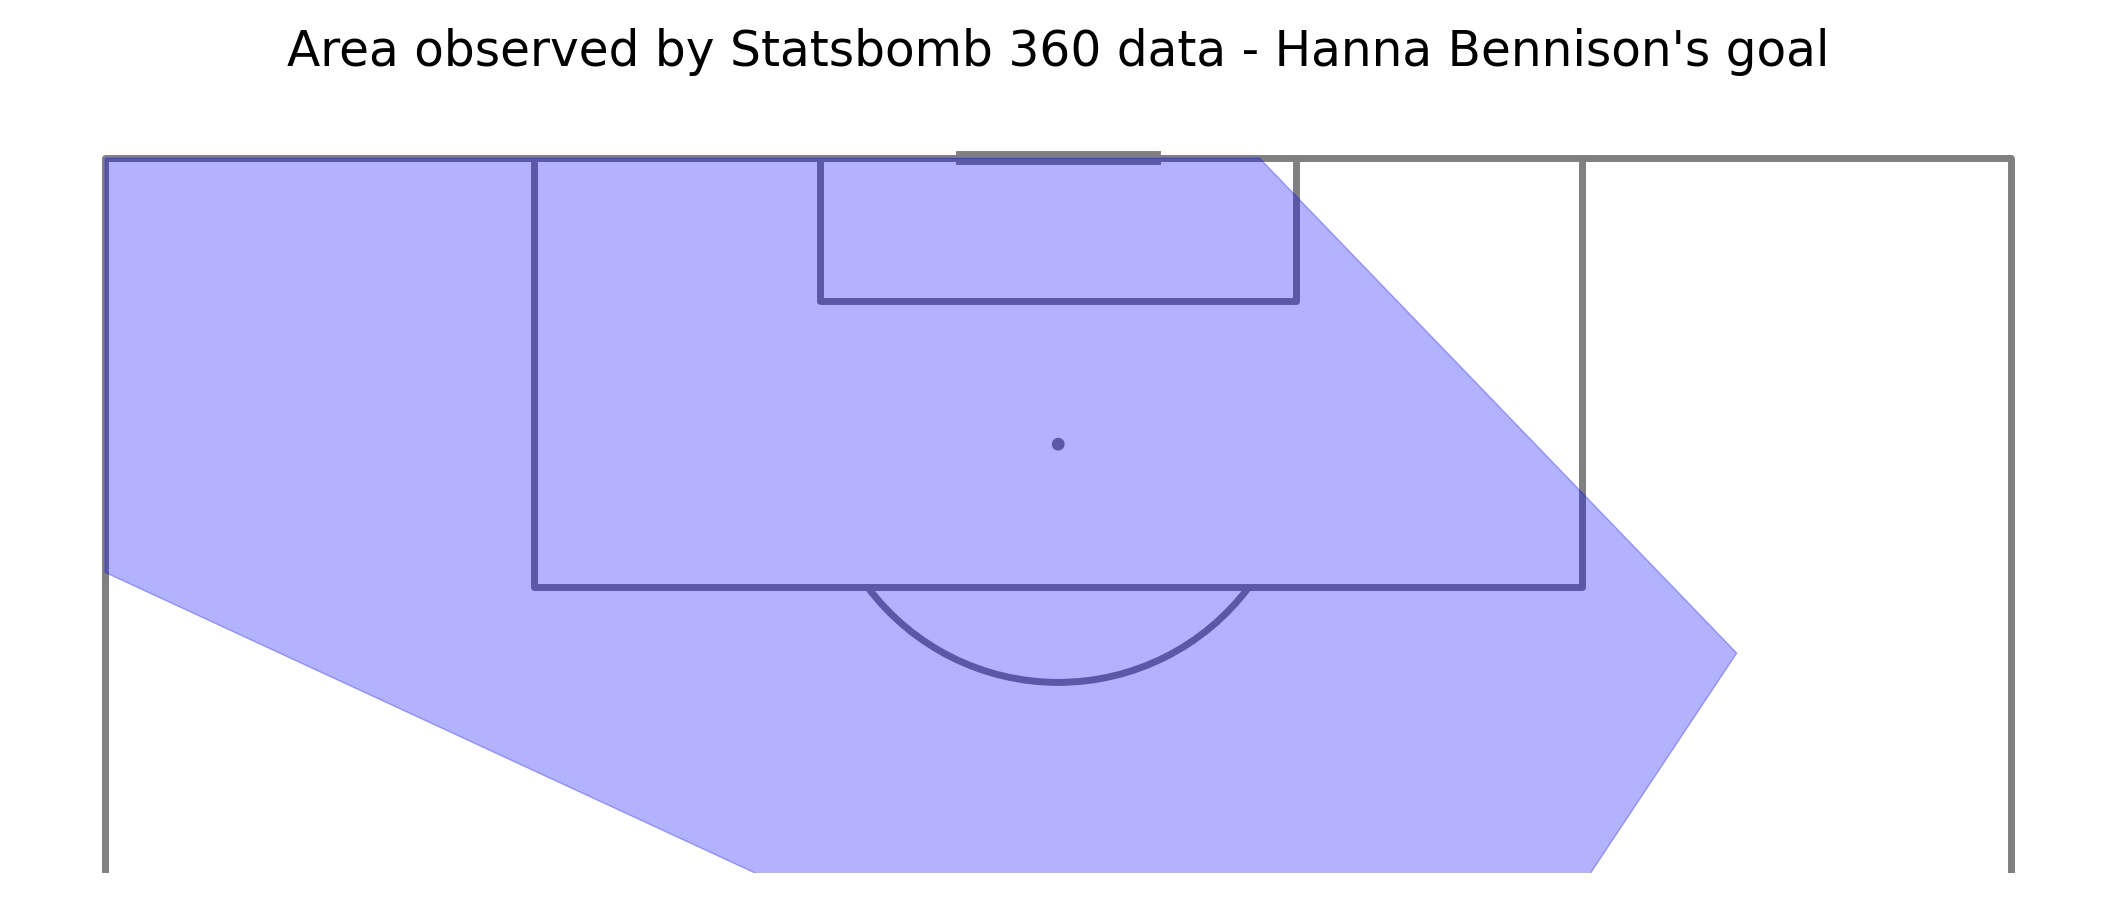

In [17]:
pitch  = VerticalPitch(line_color='grey', line_zorder = 1, half = True, pad_bottom=-30, linewidth=5)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
# add visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
fig.suptitle("Area observed by Statsbomb 360 data - Hanna Bennison's goal", fontsize = 35)
plt.show()